<a href="https://colab.research.google.com/github/xiaofanchenn/Data/blob/main/CSE514_Programming_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data file has already been uploaded to my github. You can directly click 'run' to read the data.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://github.com/xiaofanchenn/Data/raw/main/Concrete_Data.csv')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


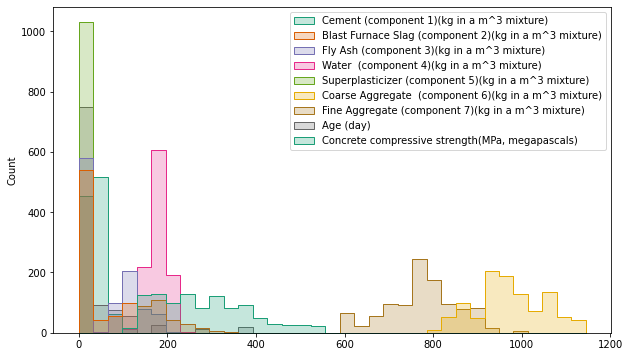

In [34]:
# Histogram of dataset without preprocessing
import seaborn as sns
sns.histplot(data=df, palette="Dark2", element='step')

In [48]:
x_train = df.iloc[:900,:8]
y_train = df.iloc[:900,8]
x_test = df.iloc[901:,:8]
y_test = df.iloc[901:,8]

**Data preprocessing** 

In [28]:
from scipy.stats import zscore
df_normalized = df.copy()

for i in range(len(df_normalized.columns)):
    df_normalized.iloc[:,i] = zscore(df_normalized.iloc[:,i])

df_normalized.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,2.645408
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.561421
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,0.266627
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,0.313340
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,0.507979


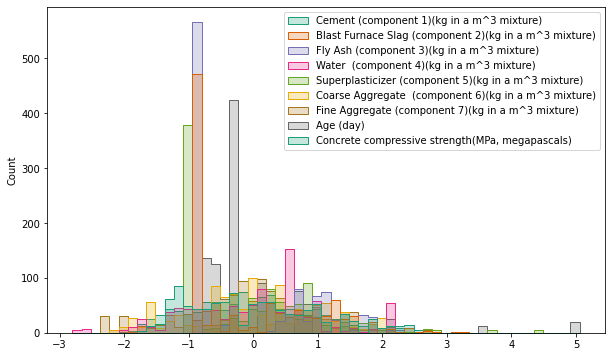

In [33]:
# Histogram after normalization
sns.histplot(data=df_normalized, palette="Dark2", element='step')

In [78]:
x_train_normal = df_normalized.iloc[:900,:8]
y_train_normal = df_normalized.iloc[:900,8]
x_test_normal = df_normalized.iloc[901:,:8]
y_test_normal = df_normalized.iloc[901:,8]

**Define gradient descent function**

In [98]:
#compute MSE as cost function
#theta: array of fitting parameters
def compute_cost(X, y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  cost = 1 / m * np.sum(sqrErrors)
  variance = np.var(y)
  variance_explained = 1 - cost/variance

  return variance_explained

In [96]:
#alpha: learning rate
def gradient_descent(X, y, theta, alpha, iterations):
  cost_history = np.zeros(iterations) #initialize parameter

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    theta = theta - sum_delta;

    cost_history[i] = compute_cost(X, y, theta)  

  return theta, cost_history

**Univariate Linear Regression**
1. without normalization

In [99]:
# here we treat univariate linear regression as a special case of multivariate linear regression
# so we first use hstack() function to add column of ones to X feature

#X = x_train
y = y_train
m = len(y)
theta = [0., 0.]
iterations = 1000;
alpha = 0.000001;
theta_train_list = []
y_train_est = []

for i in range(len(x_train.columns)):
  X = x_train.iloc[:,i]
  X_0 = np.ones((m,1))
  X_1 = X.values.reshape(m,1)
  X = np.hstack((X_0, X_1))
  theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
  theta_train_list.append(theta)
  y_train_est.append(X.dot(theta_train_list[i]))
  #print ("Final value of theta = {}, Final value of variance explained = {}, variable {}".format(theta, cost_history[-1], i+1))
  print("Variance explained of training before normalization = {}, variable {}".format(cost_history[-1], i+1))
'''
X = x_train.iloc[:,0]
y = y_train
m = len(y) #size of training data
X_0 = np.ones((m,1))
X_1 = X.values.reshape(m,1)
X = np.hstack((X_0, X_1))

theta = [0., 0.]
iterations = 1000;
alpha = 0.00001;
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
#print('cost_history =', cost_history)
print('Final cost =', cost_history[-1])
'''

Variance explained of training before normalization = 0.15716366893022404, variable 1
Variance explained of training before normalization = -2.4460663855245275, variable 2
Variance explained of training before normalization = -2.83111047077674, variable 3
Variance explained of training before normalization = -0.21031089473505826, variable 4
Variance explained of training before normalization = -3.7585881009871756, variable 5
Variance explained of training before normalization = -0.08924494859721244, variable 6
Variance explained of training before normalization = -0.12658978157793777, variable 7
Variance explained of training before normalization = -2.1938323178122126, variable 8


"\nX = x_train.iloc[:,0]\ny = y_train\nm = len(y) #size of training data\nX_0 = np.ones((m,1))\nX_1 = X.values.reshape(m,1)\nX = np.hstack((X_0, X_1))\n\ntheta = [0., 0.]\niterations = 1000;\nalpha = 0.00001;\ntheta, cost_history = gradient_descent(X, y, theta, alpha, iterations)\nprint('Final value of theta =', theta)\n#print('cost_history =', cost_history)\nprint('Final cost =', cost_history[-1])\n"

In [94]:
theta_train_list

[array([0.00191846, 0.11983517]),
 array([0.0236047 , 0.22273809]),
 array([0.04673699, 0.27806968]),
 array([0.04740369, 0.1948104 ]),
 array([0.08189772, 0.42765501]),
 array([0.0819728, 0.0365127]),
 array([0.08269921, 0.04583367]),
 array([0.10579903, 0.31197151])]

In [93]:
# testing data
y = y_test
m = len(y)
theta = [0., 0.]
iterations = 100;
alpha = 0.000001;
theta_test_list = []
y_test_est = []

for i in range(len(x_train.columns)):
  X = x_test.iloc[:,i]
  X_0 = np.ones((m,1))
  X_1 = X.values.reshape(m,1)
  X = np.hstack((X_0, X_1))
  theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
  theta_test_list.append(theta)
  y_test_est.append(X.dot(theta_test_list[i]))
  #print ("Final value of theta = {}, Final value of variance expalined = {}, variable {}".format(theta, cost_history[-1], i+1))
  print("Variance explained of testing before normalization = {}, variable {}".format(cost_history[-1], i+1))

Variance explained of testing before normalization = 0.44661602727278815, variable 1
Variance explained of testing before normalization = -1.4247669906694838, variable 2
Variance explained of testing before normalization = -3.6620066495109036, variable 3
Variance explained of testing before normalization = -0.12273363518362679, variable 4
Variance explained of testing before normalization = -6.315882553357882, variable 5
Variance explained of testing before normalization = -0.12973752688328788, variable 6
Variance explained of testing before normalization = -0.12143935598521849, variable 7
Variance explained of testing before normalization = -5.5877353800328535, variable 8


2. with normalization

In [91]:
#X = x_train_normal
y = y_train_normal
m = len(y)
theta = [0., 0.]
iterations = 1000;
alpha = 0.000001;
#theta_train_list = []
#y_train_est = []

for i in range(len(x_train_normal.columns)):
  X = x_train_normal.iloc[:,i]
  X_0 = np.ones((m,1))
  X_1 = X.values.reshape(m,1)
  X = np.hstack((X_0, X_1))
  theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
  #theta_train_list.append(theta)
  #y_train_est.append(X.dot(theta_train_list[i]))
  #print("Final value of theta = {}, Final value of variance explained = {}, variable {}".format(theta, cost_history[-1], i+1))
  print("Variance explained of training after normalization = {}, variable {}".format(cost_history[-1], i+1))

Variance explained of training after normalization = -0.0005833016176444161, variable 1
Variance explained of training after normalization = -0.0008879062321198727, variable 2
Variance explained of training after normalization = -0.0010941745479033926, variable 3
Variance explained of training after normalization = -0.0011967559762253721, variable 4
Variance explained of training after normalization = -0.00044724617346036943, variable 5
Variance explained of training after normalization = -0.001223273476463671, variable 6
Variance explained of training after normalization = -0.001149403910469804, variable 7
Variance explained of training after normalization = -0.0005511740302783785, variable 8


In [90]:
#X = x_train_normal
y = y_test_normal
m = len(y)
theta = [0., 0.]
iterations = 1000;
alpha = 0.000001;

for i in range(len(x_test_normal.columns)):
  X = x_test_normal.iloc[:,i]
  X_0 = np.ones((m,1))
  X_1 = X.values.reshape(m,1)
  X = np.hstack((X_0, X_1))
  theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
  print("Variance explained of testing after normalization = {}, variable {}".format(cost_history[-1], i+1))

Variance explained of testing after normalization = -0.10382841929434927, variable 1
Variance explained of testing after normalization = -0.10425688917460718, variable 2
Variance explained of testing after normalization = -0.10474718696765906, variable 3
Variance explained of testing after normalization = -0.10423812236986207, variable 4
Variance explained of testing after normalization = -0.10392987466326709, variable 5
Variance explained of testing after normalization = -0.10382583882925722, variable 6
Variance explained of testing after normalization = -0.10358773055998083, variable 7
Variance explained of testing after normalization = -0.10342145831231253, variable 8


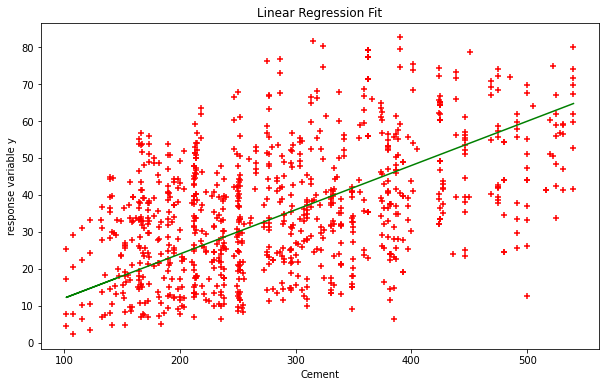

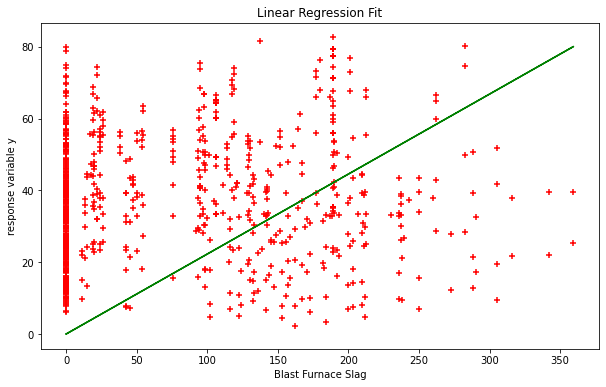

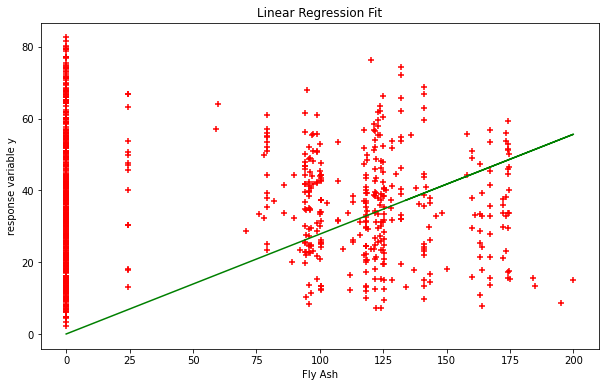

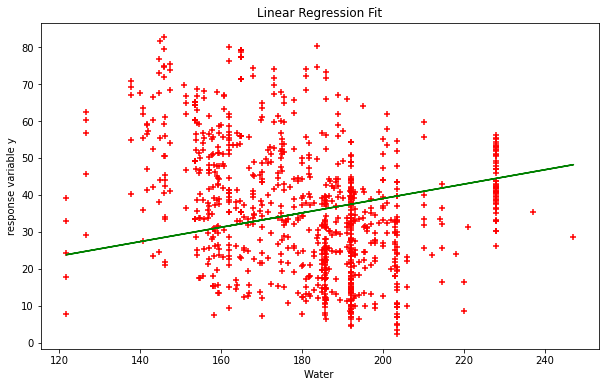

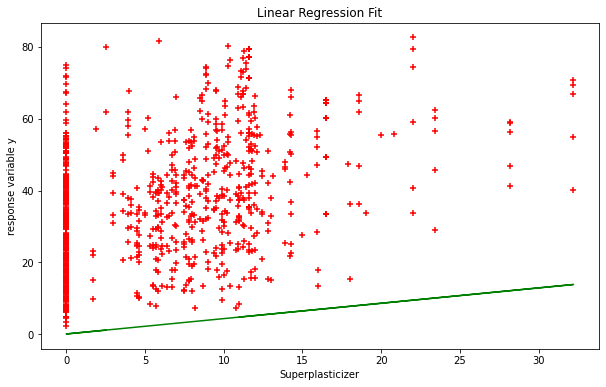

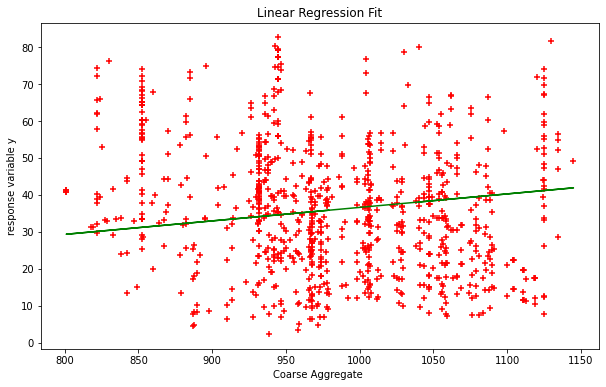

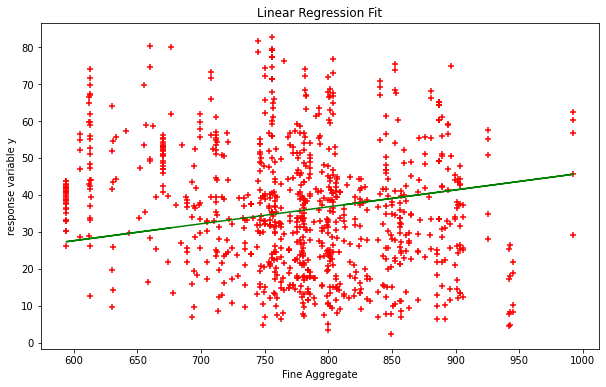

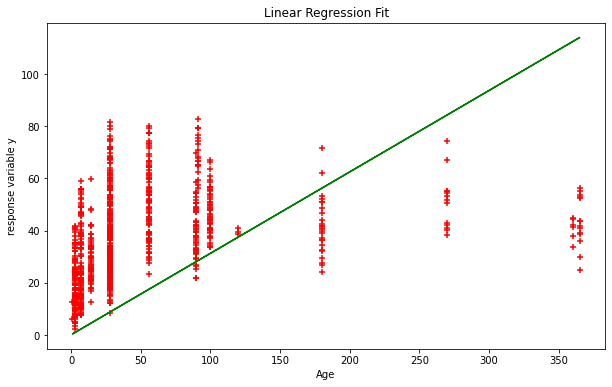

In [72]:
# plot of each univariate model
X = x_train
y = y_train
for i in range(len(x_train.columns)):
  plt.scatter(X.iloc[:,i], y_train, color='red', marker= '+', label= 'Training Data')
  plt.plot(X.iloc[:,i],y_train_est[i], color='green', label='Linear Regression')
  plt.title('Linear Regression Fit')
  var_name = x_train.columns[i].split(" (")[0]
  plt.xlabel(var_name)
  plt.ylabel("response variable y")
  plt.show()

**Multivariate Linear Regression**

1. Without data preprocessing

In [73]:
# We need theta parameter for every input variable. since we have three input variable including X_0 (column of ones)
X = x_train
y = y_train
m = len(y) #size of training data

X = np.hstack((np.ones((m,1)), X))
theta = np.zeros(9)
iterations = 1000;
alpha = 0.000001;

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('Final value from cost_history =', cost_history[-1])

Final value of theta = [ 6.25458551e-06  1.10197157e-01  8.68219423e-02  9.30940296e-02
 -8.54049375e-02  2.60819079e-02 -3.81516951e-03  1.06341345e-02
  9.69413352e-02]
Final value from cost_history = 0.5744735804987483


In [74]:
X = x_test
y = y_test
m = len(y) #size of training data

X = np.hstack((np.ones((m,1)), X))
theta = np.zeros(9)
iterations = 1000;
alpha = 0.000001;

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('Final value from cost_history =', cost_history[-1])

Final value of theta = [ 7.19379755e-05  1.31831832e-01  8.84147411e-02  4.70655824e-03
 -1.35784027e-03  1.25385505e-03 -9.23581848e-03  2.41433300e-03
  2.01426332e-03]
Final value from cost_history = 0.8330079481307309


2. With normalization

In [76]:
X = x_train_normal
y = y_train_normal
m = len(y) #size of training data

X = np.hstack((np.ones((m,1)), X))
theta = np.zeros(9)
iterations = 1000;
alpha = 0.000001;

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5 :])

Final value of theta = [ 3.33285190e-05  4.95432606e-04  1.32275161e-04 -4.75860770e-05
 -3.10889288e-04  4.41801113e-04 -1.92507909e-04 -1.86701193e-04
  3.66895660e-04]
First 5 values from cost_history = [-0.00104672 -0.00104528 -0.00104384 -0.0010424  -0.00104095]
Last 5 values from cost_history = [0.00038729 0.00038873 0.00039017 0.00039161 0.00039305]


In [79]:
X = x_test_normal
y = y_test_normal
m = len(y) #size of training data

X = np.hstack((np.ones((m,1)), X))
theta = np.zeros(9)
iterations = 1000;
alpha = 0.000001;

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5 :])

Final value of theta = [-2.32969236e-04  5.16488251e-04  1.52013164e-04 -5.10741543e-04
 -1.41618361e-04 -1.62232035e-04  2.60594418e-05 -3.15312611e-05
  6.51692097e-05]
First 5 values from cost_history = [-0.10506499 -0.10506245 -0.10505991 -0.10505737 -0.10505483]
Last 5 values from cost_history = [-0.10254284 -0.10254031 -0.10253778 -0.10253525 -0.10253273]
